In [166]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from scipy.stats import poisson
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels as st
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns
from tabulate import tabulate
import pmdarima as pm
from dateutil.relativedelta import relativedelta
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler

In [167]:
df = pd.read_csv('Datos_preprocesados_accidentes_y_victimas_accidentes.csv')

In [168]:
db_provincia41 = df[df['COD_PROVINCIA'] == 41]

In [169]:
num_victimas_dia_semana41 = db_provincia41.groupby(['ANYO', 'MES', 'DIA_SEMANA', 'HORA'])['TOTAL_VICTIMAS_24H'].sum()

In [170]:
num_victimas_dia_semana41

ANYO  MES  DIA_SEMANA  HORA
2016  1    1           11      1
                       14      2
                       19      2
                       20      1
           2           8       1
                              ..
2020  12   7           11      1
                       12      1
                       15      1
                       19      1
                       21      1
Name: TOTAL_VICTIMAS_24H, Length: 3362, dtype: int64

In [171]:
num_accidentes_por_dia_semana41 = db_provincia41.groupby(['ANYO', 'MES'])['DIA_SEMANA'].value_counts()

In [172]:
num_accidentes_por_dia_semana41

ANYO  MES  DIA_SEMANA
2016  1    5              9
           7              8
           2              6
           4              6
           1              5
                         ..
2020  12   5             10
           6             10
           3              9
           7              7
           2              4
Name: count, Length: 417, dtype: int64

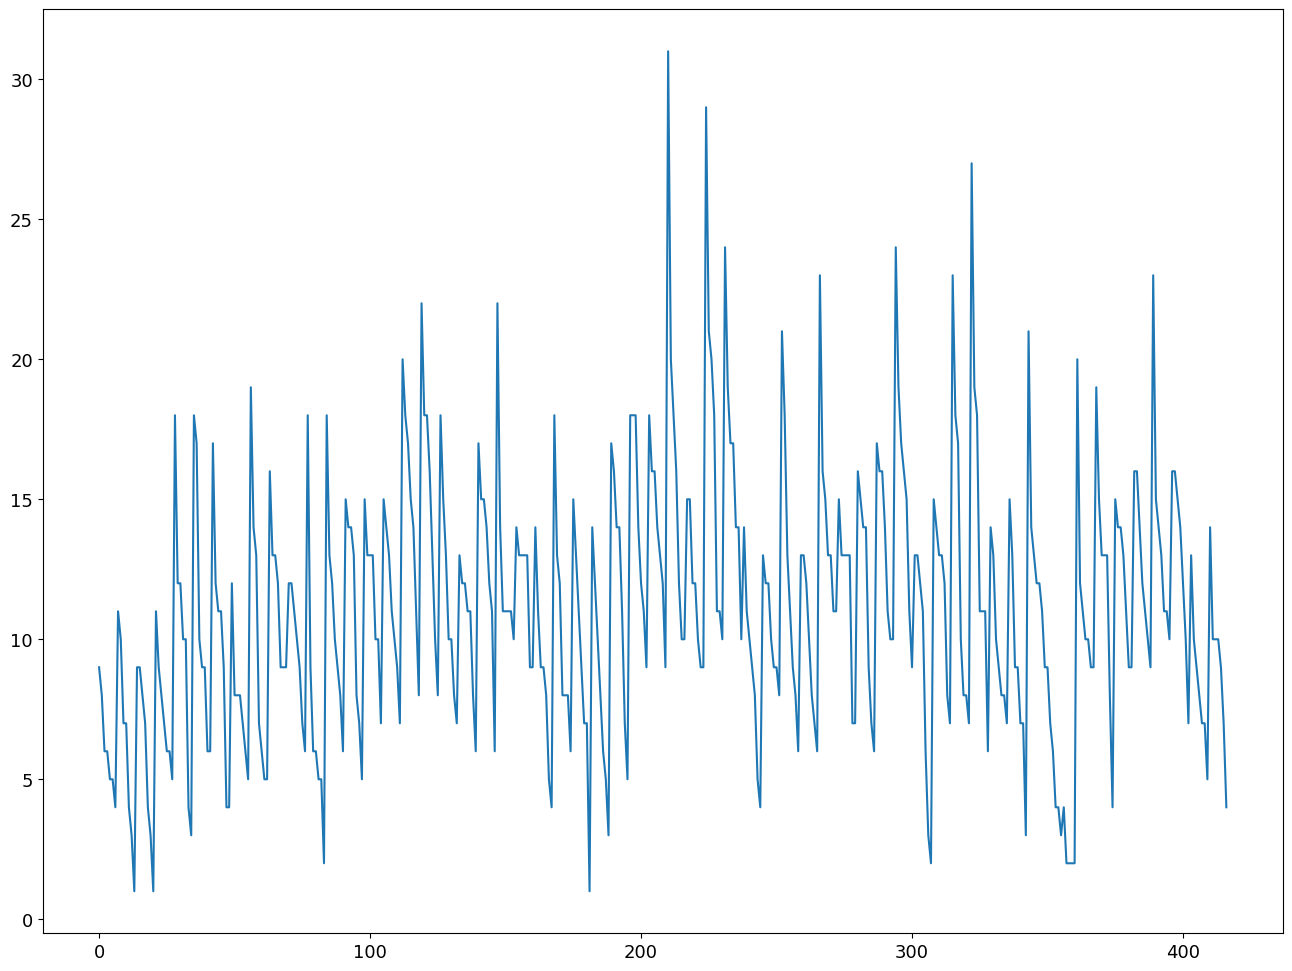

In [173]:
plt.plot(num_accidentes_por_dia_semana41.values)

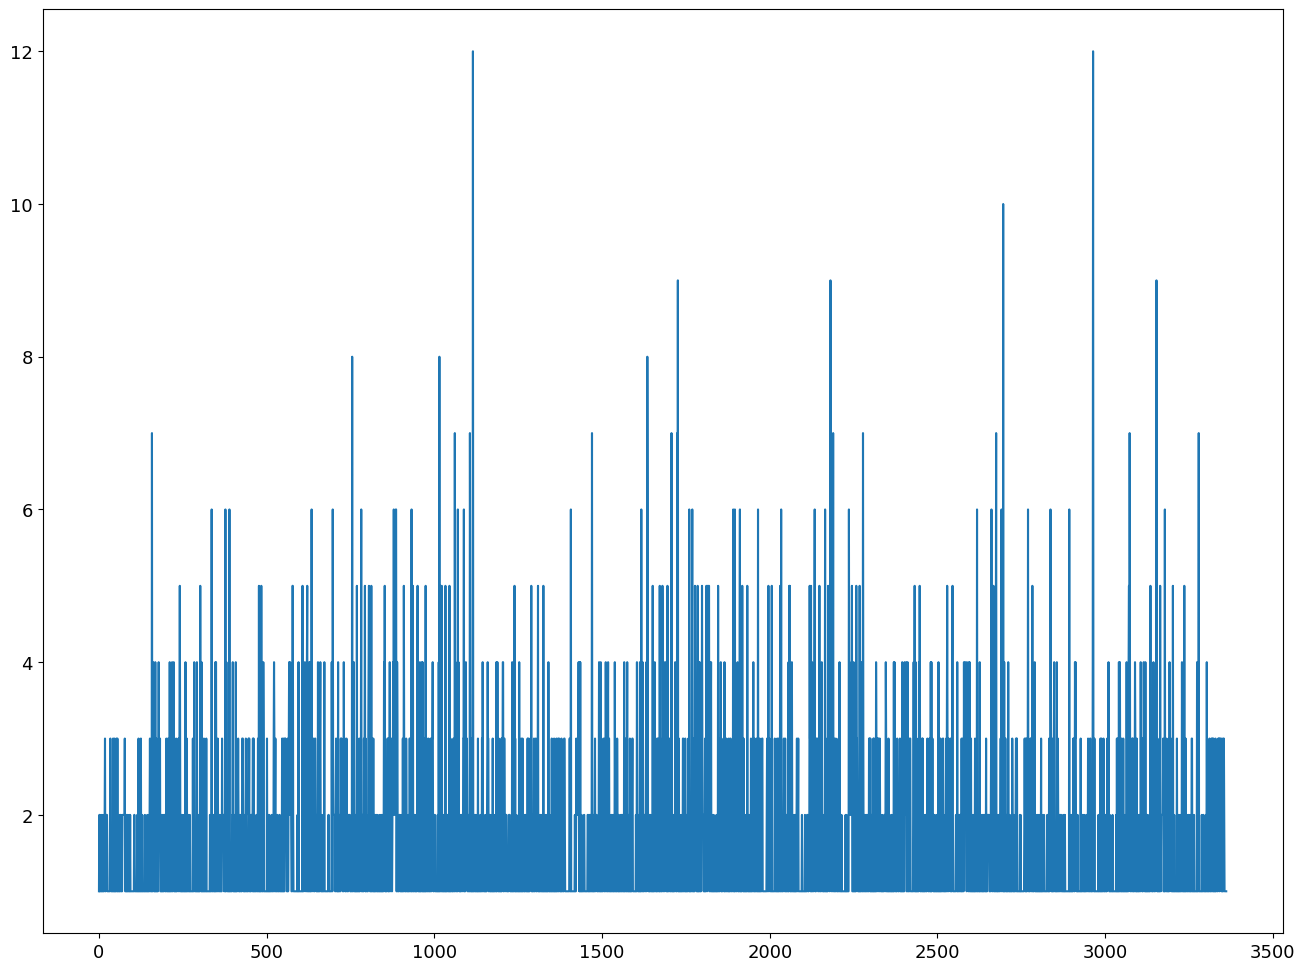

In [174]:
plt.plot(num_victimas_dia_semana41.values)

In [175]:
num_accidentes_por_dia_semana41 = num_accidentes_por_dia_semana41.reset_index()

In [176]:
num_accidentes_por_dia_semana41['FECHA'] = num_accidentes_por_dia_semana41.apply(lambda row: str(row['ANYO']) + '/' + str(row['MES']) + '/' + str(row['DIA_SEMANA']), axis = 1)

In [177]:
num_accidentes_por_dia_semana41

,ANYO,MES,DIA_SEMANA,count,FECHA
0,2016,1,5,9,2016/1/5
1,2016,1,7,8,2016/1/7
2,2016,1,2,6,2016/1/2
3,2016,1,4,6,2016/1/4
4,2016,1,1,5,2016/1/1
...,...,...,...,...,...
412,2020,12,5,10,2020/12/5
413,2020,12,6,10,2020/12/6
414,2020,12,3,9,2020/12/3
415,2020,12,7,7,2020/12/7


In [178]:
num_victimas_dia_semana41 = num_victimas_dia_semana41.reset_index()

In [179]:
num_victimas_dia_semana41

,ANYO,MES,DIA_SEMANA,HORA,TOTAL_VICTIMAS_24H
0,2016,1,1,11,1
1,2016,1,1,14,2
2,2016,1,1,19,2
3,2016,1,1,20,1
4,2016,1,2,8,1
...,...,...,...,...,...
3357,2020,12,7,11,1
3358,2020,12,7,12,1
3359,2020,12,7,15,1
3360,2020,12,7,19,1


In [180]:
num_victimas_dia_semana41['FECHA'] = num_victimas_dia_semana41.apply(lambda row: str(row['ANYO']) + '/' + str(row['MES']) + '/' + str(row['DIA_SEMANA']), axis = 1)

In [181]:
num_victimas_dia_semana41

,ANYO,MES,DIA_SEMANA,HORA,TOTAL_VICTIMAS_24H,FECHA
0,2016,1,1,11,1,2016/1/1
1,2016,1,1,14,2,2016/1/1
2,2016,1,1,19,2,2016/1/1
3,2016,1,1,20,1,2016/1/1
4,2016,1,2,8,1,2016/1/2
...,...,...,...,...,...,...
3357,2020,12,7,11,1,2020/12/7
3358,2020,12,7,12,1,2020/12/7
3359,2020,12,7,15,1,2020/12/7
3360,2020,12,7,19,1,2020/12/7


In [182]:
num_accidentes_por_dia_semana41

,ANYO,MES,DIA_SEMANA,count,FECHA
0,2016,1,5,9,2016/1/5
1,2016,1,7,8,2016/1/7
2,2016,1,2,6,2016/1/2
3,2016,1,4,6,2016/1/4
4,2016,1,1,5,2016/1/1
...,...,...,...,...,...
412,2020,12,5,10,2020/12/5
413,2020,12,6,10,2020/12/6
414,2020,12,3,9,2020/12/3
415,2020,12,7,7,2020/12/7


In [183]:
num_victimas_dia_semana41

,ANYO,MES,DIA_SEMANA,HORA,TOTAL_VICTIMAS_24H,FECHA
0,2016,1,1,11,1,2016/1/1
1,2016,1,1,14,2,2016/1/1
2,2016,1,1,19,2,2016/1/1
3,2016,1,1,20,1,2016/1/1
4,2016,1,2,8,1,2016/1/2
...,...,...,...,...,...,...
3357,2020,12,7,11,1,2020/12/7
3358,2020,12,7,12,1,2020/12/7
3359,2020,12,7,15,1,2020/12/7
3360,2020,12,7,19,1,2020/12/7


In [184]:
df_provincia41 = num_accidentes_por_dia_semana41.merge(num_victimas_dia_semana41, on = 'FECHA')

In [185]:
df_provincia41 = df_provincia41[['ANYO_x', 'FECHA', 'count', 'TOTAL_VICTIMAS_24H']]

In [186]:
df_provincia41.describe()

,ANYO_x,count,TOTAL_VICTIMAS_24H
count,3362.000000,3362.000000,3362.000000
mean,2018.049673,12.484533,1.740333
std,1.345063,4.607075,1.161250
min,2016.000000,1.000000,1.000000
25%,2017.000000,9.000000,1.000000
50%,2018.000000,12.000000,1.000000
75%,2019.000000,15.000000,2.000000
max,2020.000000,31.000000,12.000000


In [187]:
promedio_diario = pd.read_csv('evolucion_del_trafico_medio_en_las_autopistas_estatales_de_peaje_en_españa.csv', sep = ';')

In [188]:
promedio_diario.drop(promedio_diario[promedio_diario['Año'] == '2015'].index, inplace = True)

In [189]:
promedio_diario.dropna(inplace = True)

## PARA INTENSIDAD MEDIA DE VEHÍCULOS

In [190]:
inicio = datetime(2016,1,1)

lista_fechas = [inicio + relativedelta(months=+d) for d in range(0,48)]
print(lista_fechas)

[datetime.datetime(2016, 1, 1, 0, 0), datetime.datetime(2016, 2, 1, 0, 0), datetime.datetime(2016, 3, 1, 0, 0), datetime.datetime(2016, 4, 1, 0, 0), datetime.datetime(2016, 5, 1, 0, 0), datetime.datetime(2016, 6, 1, 0, 0), datetime.datetime(2016, 7, 1, 0, 0), datetime.datetime(2016, 8, 1, 0, 0), datetime.datetime(2016, 9, 1, 0, 0), datetime.datetime(2016, 10, 1, 0, 0), datetime.datetime(2016, 11, 1, 0, 0), datetime.datetime(2016, 12, 1, 0, 0), datetime.datetime(2017, 1, 1, 0, 0), datetime.datetime(2017, 2, 1, 0, 0), datetime.datetime(2017, 3, 1, 0, 0), datetime.datetime(2017, 4, 1, 0, 0), datetime.datetime(2017, 5, 1, 0, 0), datetime.datetime(2017, 6, 1, 0, 0), datetime.datetime(2017, 7, 1, 0, 0), datetime.datetime(2017, 8, 1, 0, 0), datetime.datetime(2017, 9, 1, 0, 0), datetime.datetime(2017, 10, 1, 0, 0), datetime.datetime(2017, 11, 1, 0, 0), datetime.datetime(2017, 12, 1, 0, 0), datetime.datetime(2018, 1, 1, 0, 0), datetime.datetime(2018, 2, 1, 0, 0), datetime.datetime(2018, 3, 1, 0

In [191]:
promedio_diario['FECHA'] = lista_fechas

### PREANÁLISIS PARA MODELOS

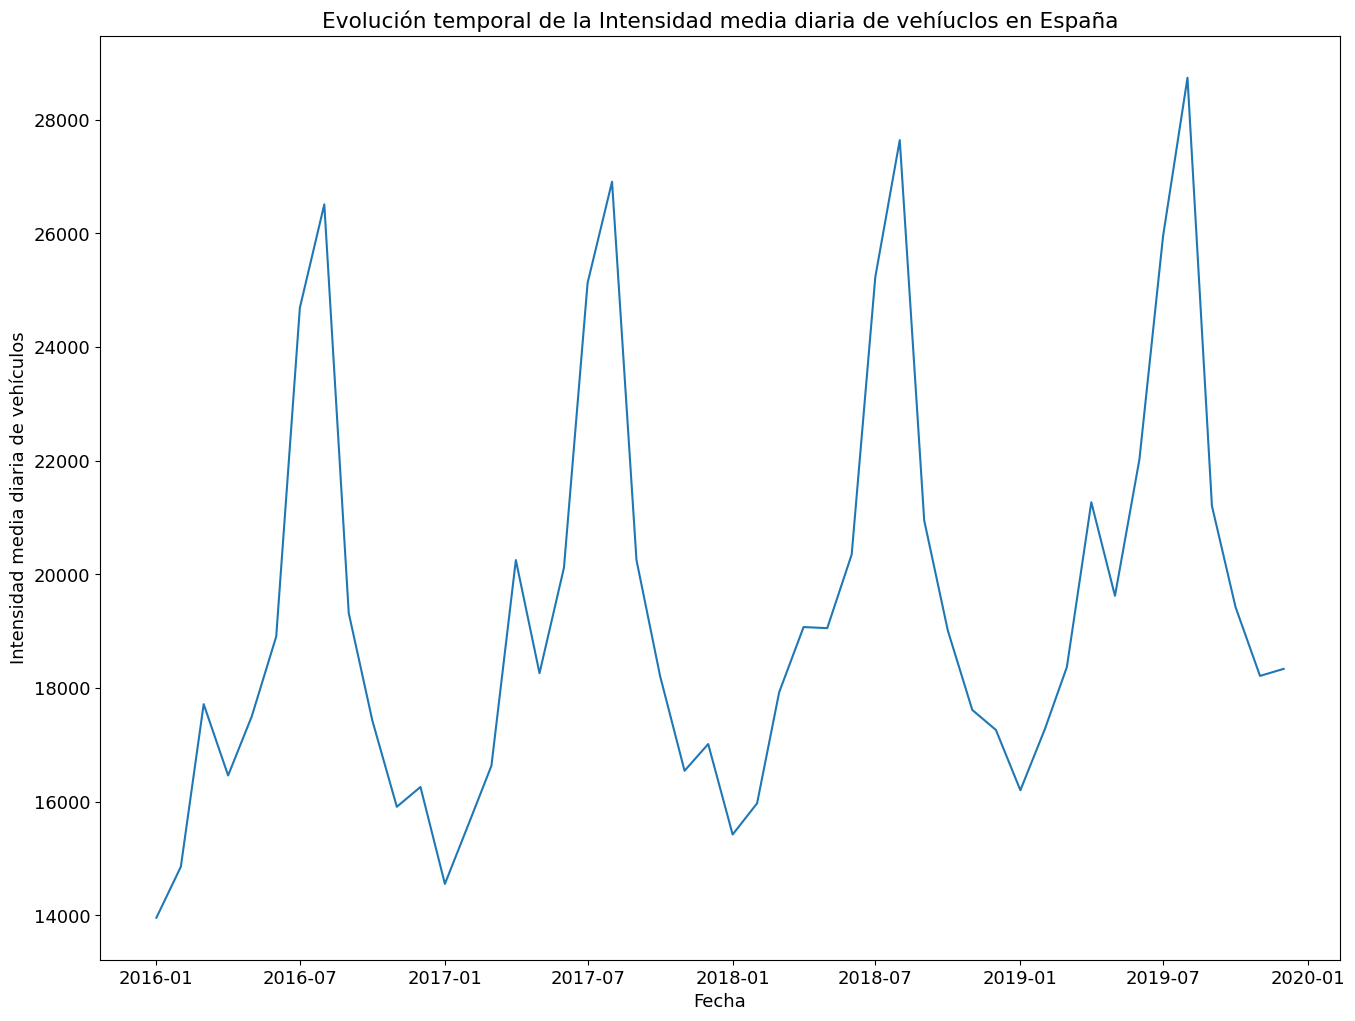

In [192]:
promedio_diario['Intensidad media diaria de vehículos'] = promedio_diario['Intensidad media diaria de vehículos'].astype('int')
plt.plot( promedio_diario['FECHA'], promedio_diario['Intensidad media diaria de vehículos'])
plt.title('Evolución temporal de la Intensidad media diaria de vehíuclos en España')
plt.xlabel('Fecha')
plt.ylabel('Intensidad media diaria de vehículos')

plt.show()

Como se puede observar en la gráfica, hay estacionalidad cada año, por lo que vamos a hacer una descomposición estacional con el modelo aditivo.

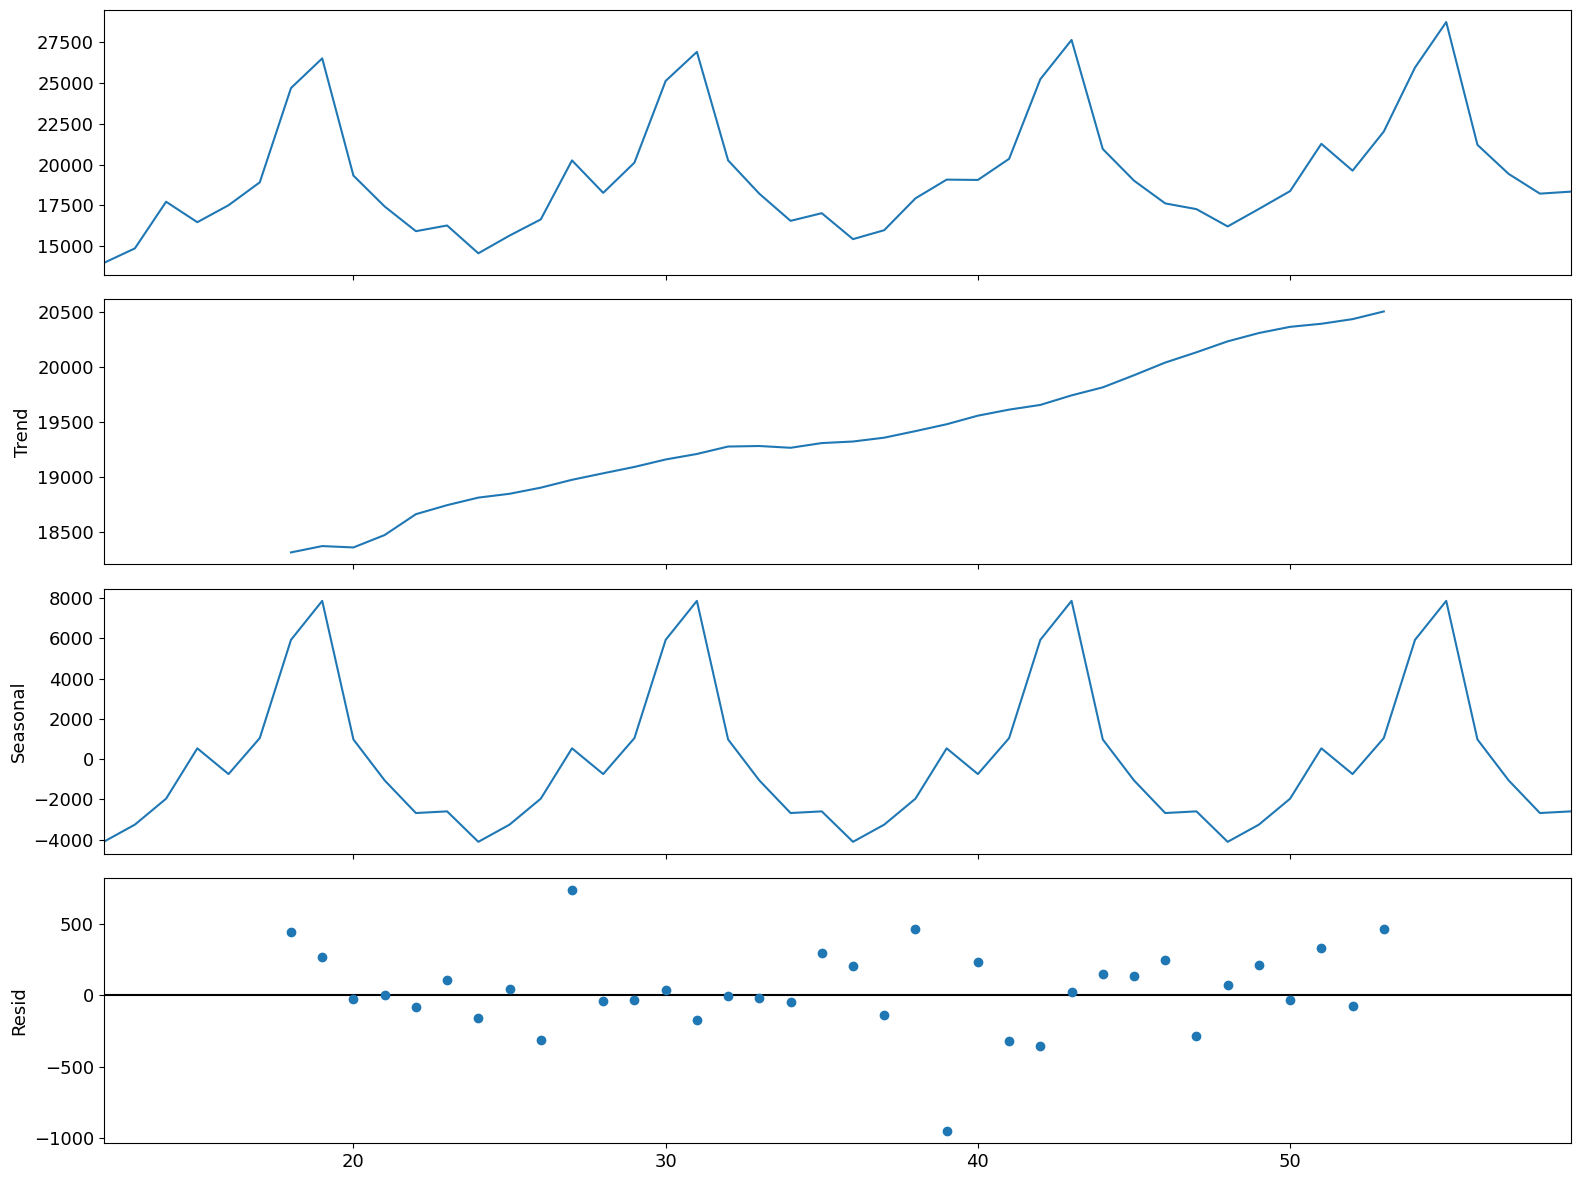

In [193]:
Additive_decomposition= seasonal_decompose(promedio_diario[['Intensidad media diaria de vehículos']], model='additive', period=12)
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)
fig = Additive_decomposition.plot()

Se puede ver que la tendencia va aumentando, es decir, conforme pasan los años, se esperan cada vez más vehículos.

También se puede observar que existe la estacionalidad ya que vemos un patrón que se repite.

Por último, existe aleatoreidad ya que no hay un patrón reconocible en los residuales.

#### SUAVIZADO EXPONENCIAL

Se trata de quitar la estacionalidad al modelo para ver cómo se comporta. Al ser un modelo 'aditivo', podemos pensarlo como interferencia de ondas, es decir, si sumamos cresta con cresta, la onda aumenta, mientras que si sumamos cresta con valle, se anulan. Por esto, la estacionalidad ajustada es quitarle a los datos originales, la estacionalidad, por lo que se terminan anulando al rededor de la tendencia (en la gráfica de arriba, se resta la primera gráfica con la tercera).

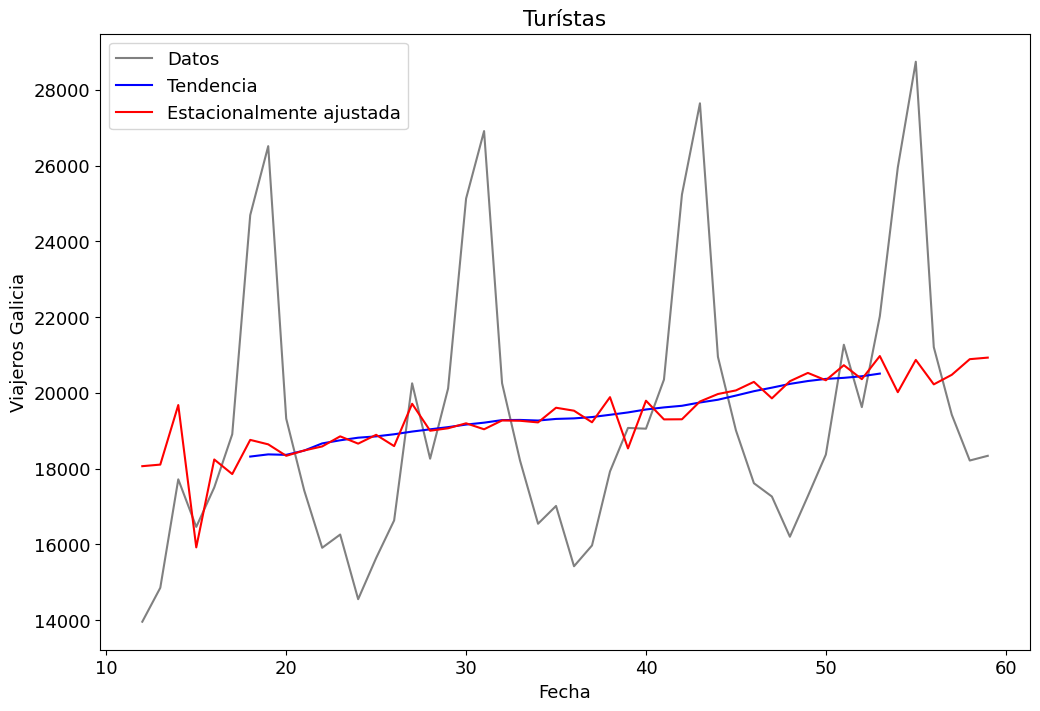

In [194]:
S_Ajustada_Est = promedio_diario['Intensidad media diaria de vehículos']-Additive_decomposition.seasonal
# Graficar la serie original y las componentes
plt.figure(figsize=(12, 8))
# Serie original
plt.plot(promedio_diario['Intensidad media diaria de vehículos'], label='Datos', color='gray')
# Tendencia
plt.plot(Additive_decomposition.trend, label='Tendencia', color='blue')
# Estacionalmente ajustada
plt.plot(S_Ajustada_Est, label='Estacionalmente ajustada', color='red')
plt.xlabel('Fecha')
plt.ylabel('Viajeros Galicia')
plt.title('Turístas')
plt.legend()
plt.show()

Para evaluar los modelos, hay que separar los datos en train y test. Al ser una serie temporal, separaremos los últimos 10 datos.

In [195]:
train=promedio_diario[:38]
test=promedio_diario[38:]

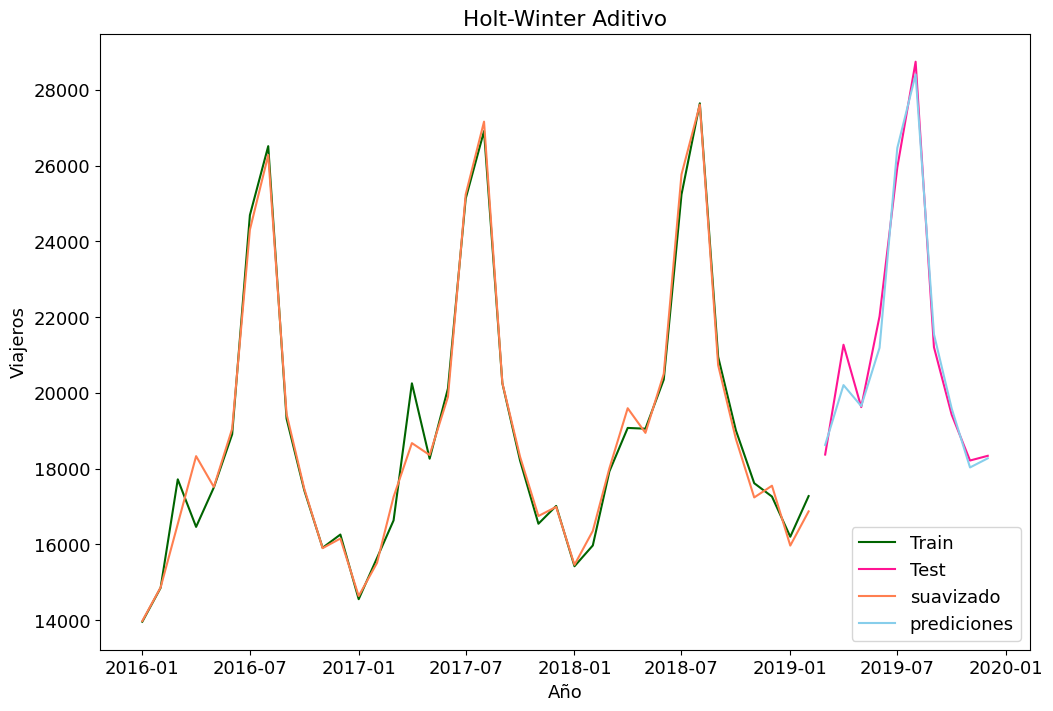

In [196]:
# Aplicar todo tipo de suavizados
model1 = ExponentialSmoothing(train['Intensidad media diaria de vehículos'].to_numpy(), seasonal_periods=12,trend="add",
seasonal="add", initialization_method="estimated").fit()
fcast = model1.forecast(10)
fcast=pd.Series(list(fcast), index= list(test['FECHA']))
predicciones=model1.fittedvalues
predicciones= pd.Series(list(predicciones), index= list(train['FECHA']))
plt.figure(figsize=(12, 8))
# Series
plt.plot(train['FECHA'], train['Intensidad media diaria de vehículos'], label='Train', color='DarkGreen')
plt.plot(test['FECHA'], test['Intensidad media diaria de vehículos'], label='Test', color='DeepPink')
plt.plot(predicciones, label='suavizado', color='coral')
plt.plot(fcast,color='SkyBlue', label="prediciones")
plt.xlabel('Año')
plt.ylabel('Viajeros')
plt.title('Holt-Winter Aditivo')
plt.legend()
plt.show()

In [197]:
fcast #prediccion para 2019

2019-03-01    18625.377521
2019-04-01    20204.798905
2019-05-01    19650.207043
2019-06-01    21190.064916
2019-07-01    26461.508545
2019-08-01    28403.631869
2019-09-01    21546.355158
2019-10-01    19585.911327
2019-11-01    18031.018059
2019-12-01    18271.570450
dtype: float64

In [198]:
promedio_diario[promedio_diario['Año'] == '2019'] #valores reales ed 2019

,Año,Periodo,Intensidad media diaria de vehículos,FECHA
48,2019,Enero,16202,2019-01-01
49,2019,Febrero,17275,2019-02-01
50,2019,Marzo,18371,2019-03-01
51,2019,Abril,21270,2019-04-01
52,2019,Mayo,19623,2019-05-01
53,2019,Junio,22022,2019-06-01
54,2019,Julio,25950,2019-07-01
55,2019,Agosto,28740,2019-08-01
56,2019,Septiembre,21206,2019-09-01
57,2019,Octubre,19423,2019-10-01


Se puede ver que ha hecho una buena predicción con un error inferior al 10%, es decir, podrçia ser un buen modelo.

#### ARIMA

Para poder llevar a cabo este modelo adecuadamente, necesitamos hacer el análisis de los correlogramas

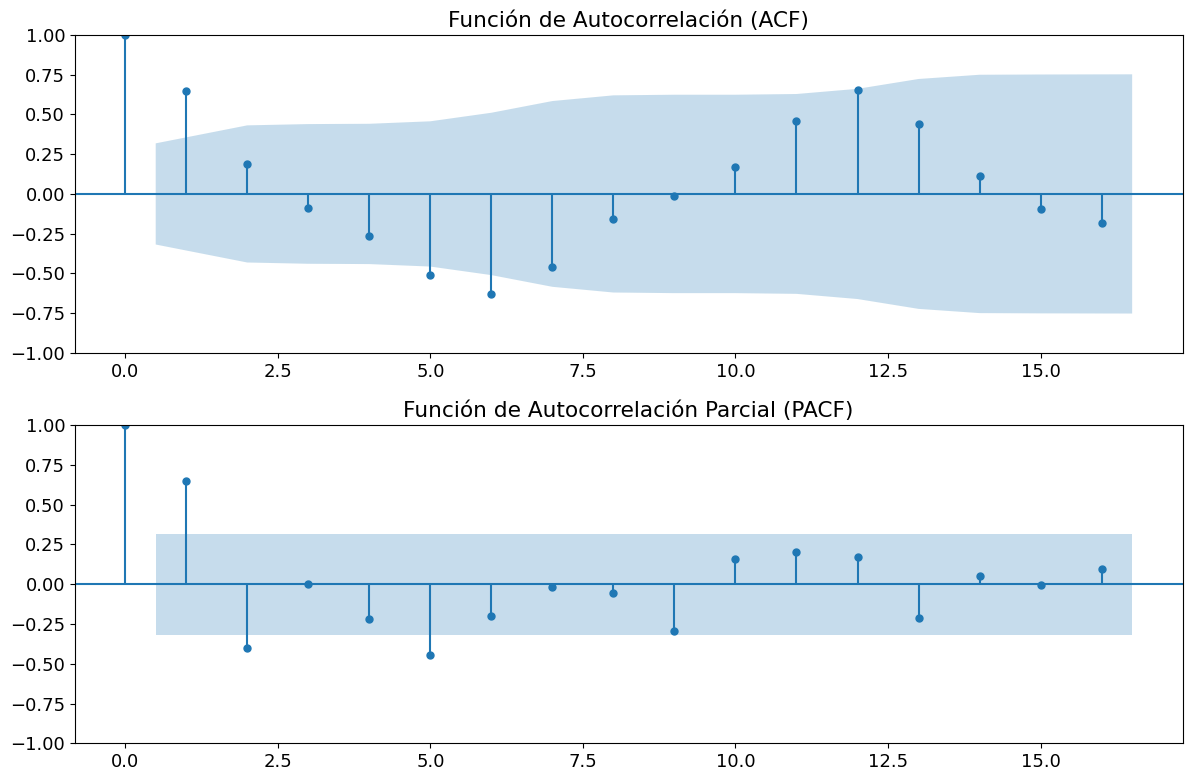

In [199]:
# Crear subgráficos para ACF y PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
# Graficar la función de autocorrelación (ACF)
plot_acf(train['Intensidad media diaria de vehículos'], ax=ax1)
ax1.set_title('Función de Autocorrelación (ACF)')
# Graficar la función de autocorrelación parcial (PACF)
plot_pacf(train['Intensidad media diaria de vehículos'], ax=ax2)
ax2.set_title('Función de Autocorrelación Parcial (PACF)')
# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
# Mostrar los subgráficos
plt.show()

Se puede ver perfectamente que la serie es estacional. Este conjunto de datos en particular es relativamente sencillo de observar, ya que, solo son 48 datos. Sin embargo, en el caso de las provincias, el número es mucho mayor, por lo que será más complicado verlo a ojo. Por lo tanto, se puede hacer también el uso de serie en diferencias, es decir, sacar la derivada y ver si hay o no un cambio entre uno y el otro.

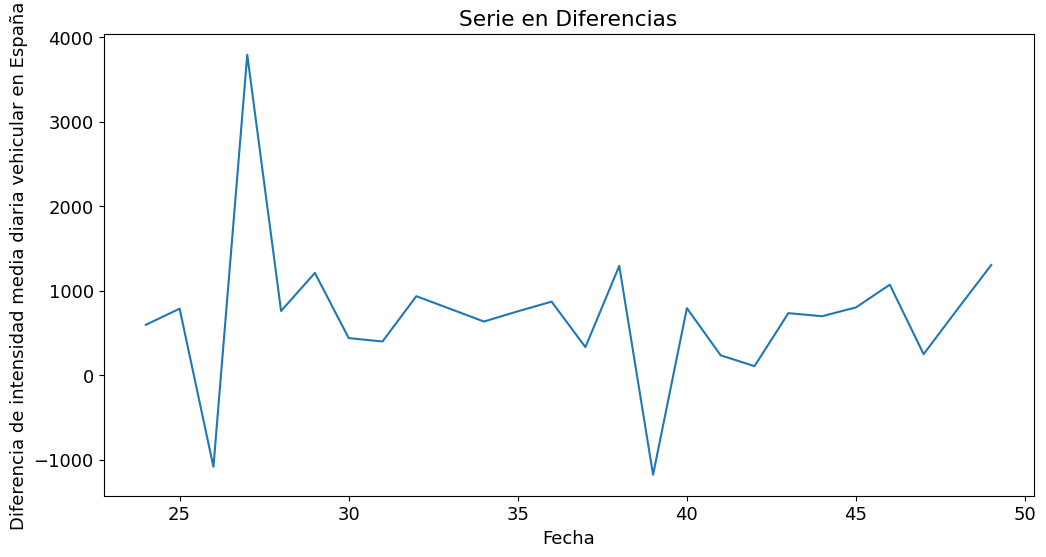

In [200]:
diferencias = train['Intensidad media diaria de vehículos'].diff(12)
plt.figure(figsize=(12, 6))
plt.plot(diferencias)
plt.title('Serie en Diferencias')
plt.xlabel('Fecha')
plt.ylabel('Diferencia de intensidad media diaria vehicular en España')
plt.show()

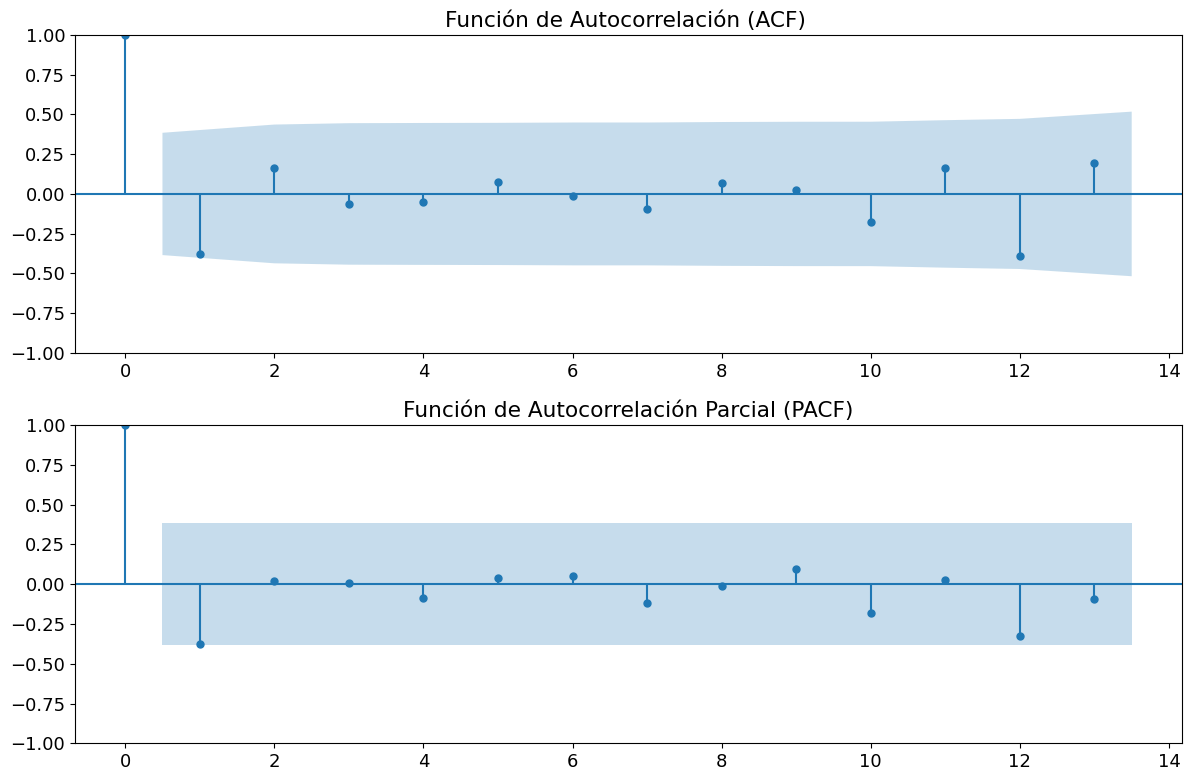

In [201]:
diferencias = diferencias.dropna()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(diferencias, ax=ax1)
ax1.set_title('Función de Autocorrelación (ACF) ')
plot_pacf(diferencias, ax=ax2)
ax2.set_title('Función de Autocorrelación Parcial (PACF)')
plt.tight_layout()
plt.show()

In [202]:
modelo_auto= pm.auto_arima(train['Intensidad media diaria de vehículos'], start_p=1, start_q=1, max_p=3, max_q=3,
m=12, start_P=0, seasonal=True, d=0, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True) # mostramos los modelos probados

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=430.277, Time=0.48 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=428.256, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=430.446, Time=0.24 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=431.271, Time=0.24 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=439.686, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=430.252, Time=0.04 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=430.251, Time=0.04 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=432.239, Time=0.14 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=428.573, Time=0.04 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=429.045, Time=0.04 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=428.165, Time=0.11 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=430.237, Time=0.24 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=430.152, Time=0.07 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   

In [203]:
print(modelo_auto.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   38
Model:             SARIMAX(1, 0, 1)x(0, 1, [], 12)   Log Likelihood                -210.082
Date:                             Mon, 29 Apr 2024   AIC                            428.165
Time:                                     21:04:38   BIC                            433.197
Sample:                                          0   HQIC                           429.614
                                              - 38                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1284.2352    339.554      3.782      0.000     618.721    1949.749
ar.L1         -0.8004      

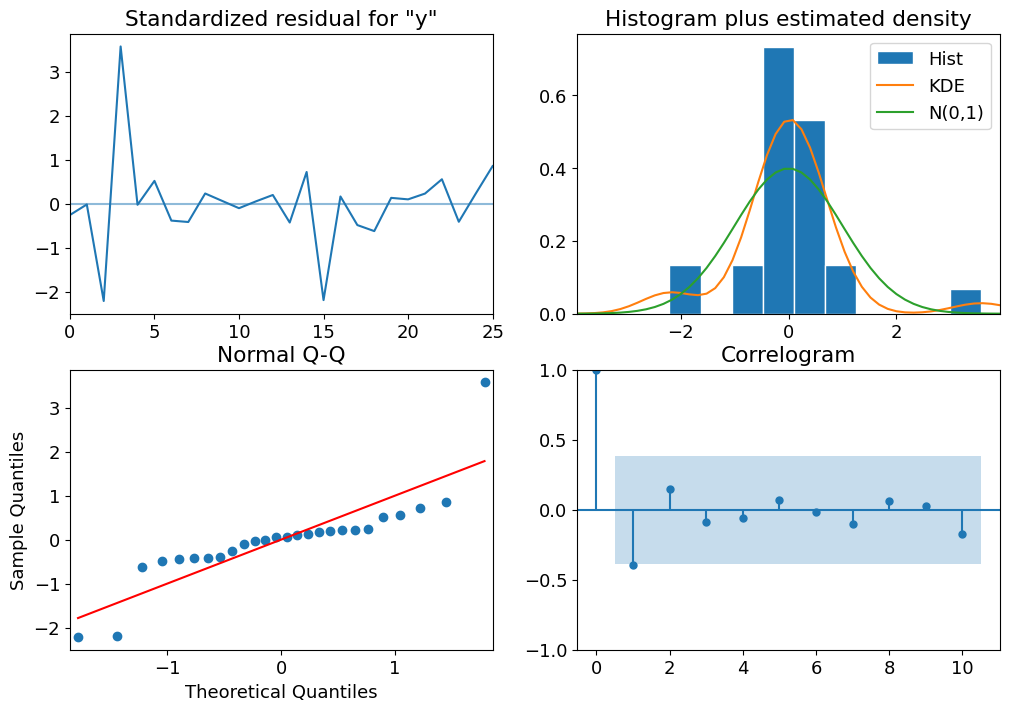

In [204]:
best_arima = sm.tsa.ARIMA(train['Intensidad media diaria de vehículos'].to_numpy().astype(int), order=(1, 0, 1), seasonal_order=(0, 1, 0, 12))
resultados_a = best_arima.fit()
# Graficar los residuos del modelo
resultados_a.plot_diagnostics(figsize=(12, 8))
plt.show()

Como se puede observar, los residuales no estan correlacionados, ya que no se ve un patrón en la primera gráfica. Además, estos siguen una distribución normal.

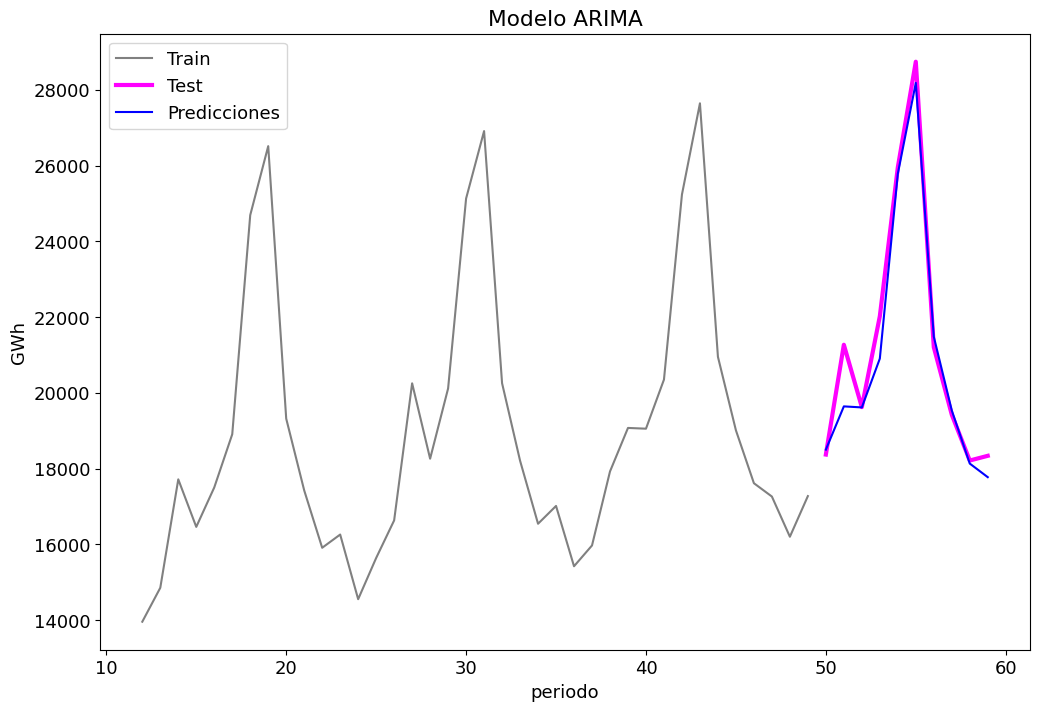

In [205]:
prediciones_a = resultados_a.get_forecast(steps=10)
pred_test_a=prediciones_a.predicted_mean
intervalos_confianza_a = prediciones_a.conf_int()
pred_test_a= pd.Series(list(pred_test_a), index= list(test['Intensidad media diaria de vehículos'].index))
plt.figure(figsize=(12, 8))
plt.plot(train['Intensidad media diaria de vehículos'], label='Train', color='gray')
plt.plot(test['Intensidad media diaria de vehículos'], label='Test', color='Magenta', linewidth = 3)
plt.plot(pred_test_a, label='Predicciones', color='blue')
plt.xlabel('periodo')
plt.ylabel('GWh')
plt.title('Modelo ARIMA')
plt.legend()
plt.show()

In [206]:
pred_test_a

50    18501.322321
51    19642.743127
52    19615.263607
53    20903.882450
54    25781.598362
55    28181.410067
56    21483.316305
57    19536.315833
58    18133.407423
59    17774.589866
dtype: float64

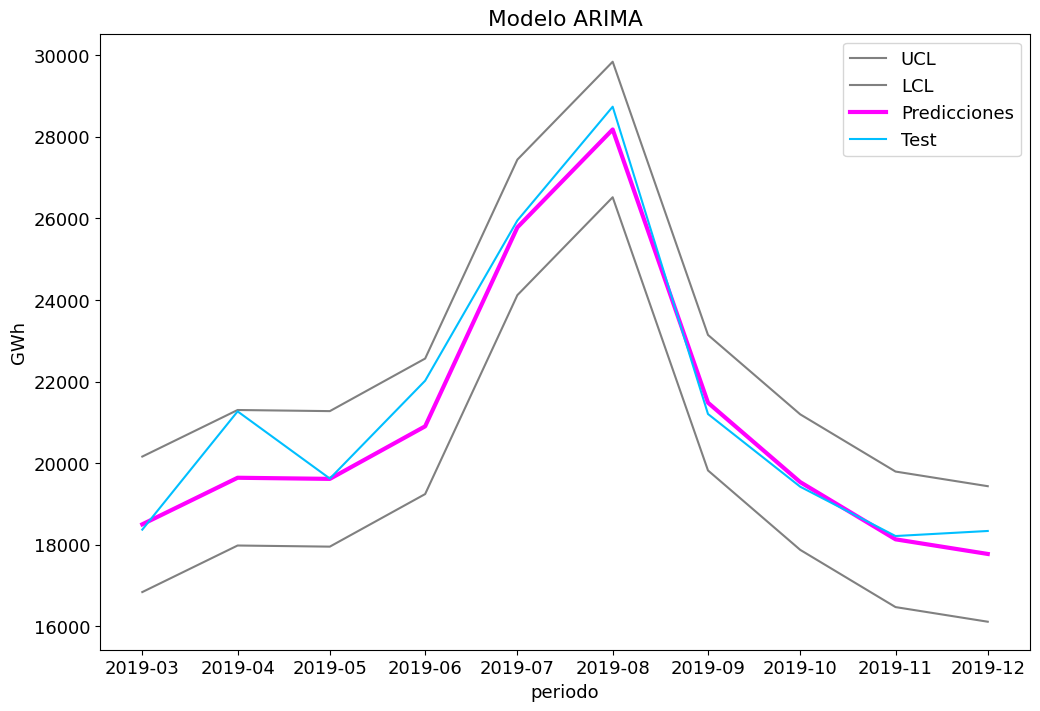

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [207]:
plt.figure(figsize=(12, 8))
# Serie original
intervalos_confianza_low= pd.Series(list(intervalos_confianza_a[:,0]), index= list(test['FECHA']))
intervalos_confianza_upper= pd.Series(list(intervalos_confianza_a[:,1]), index= list(test['FECHA']))
plt.plot(intervalos_confianza_low, label='UCL', color='gray')
plt.plot(intervalos_confianza_upper, label='LCL', color='gray')
plt.plot(test['FECHA'], pred_test_a, label='Predicciones', color='Magenta', linewidth = 3)
plt.plot(test['FECHA'], test['Intensidad media diaria de vehículos'], label='Test', color='DeepSkyBlue')
plt.xlabel('periodo')
plt.ylabel('GWh')
plt.title('Modelo ARIMA')
plt.legend()
plt.show()
plt.figure(figsize=(12, 8))

In [208]:
test

,Año,Periodo,Intensidad media diaria de vehículos,FECHA
50,2019,Marzo,18371,2019-03-01
51,2019,Abril,21270,2019-04-01
52,2019,Mayo,19623,2019-05-01
53,2019,Junio,22022,2019-06-01
54,2019,Julio,25950,2019-07-01
55,2019,Agosto,28740,2019-08-01
56,2019,Septiembre,21206,2019-09-01
57,2019,Octubre,19423,2019-10-01
58,2019,Noviembre,18214,2019-11-01
59,2019,Diciembre,18338,2019-12-01


In [209]:
pred_test_a

50    18501.322321
51    19642.743127
52    19615.263607
53    20903.882450
54    25781.598362
55    28181.410067
56    21483.316305
57    19536.315833
58    18133.407423
59    17774.589866
dtype: float64

Como se puede ver, los resultados se acercan bastante pero no al 100%.

#### PROPHET

In [210]:
promedio_diario['y'] = promedio_diario['Intensidad media diaria de vehículos']
promedio_diario['ds'] = pd.to_datetime(pd.to_datetime(promedio_diario['FECHA']).dt.date)

21:04:39 - cmdstanpy - INFO - Chain [1] start processing
21:04:39 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


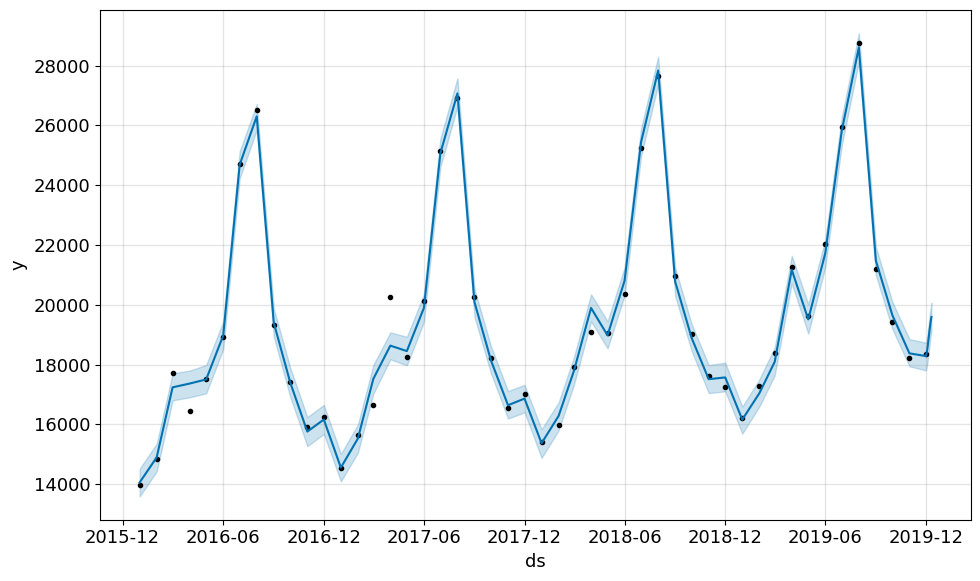

In [211]:
ts = promedio_diario[['ds', 'y']]
model = Prophet(
   yearly_seasonality=True,
   seasonality_mode=['additive','multiplicative'][0]
   ).add_country_holidays(country_name='ESP'
   ).fit(ts)

future = model.make_future_dataframe(periods=10)
forecast = model.predict(future)
fig1 = model.plot(forecast)

c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing

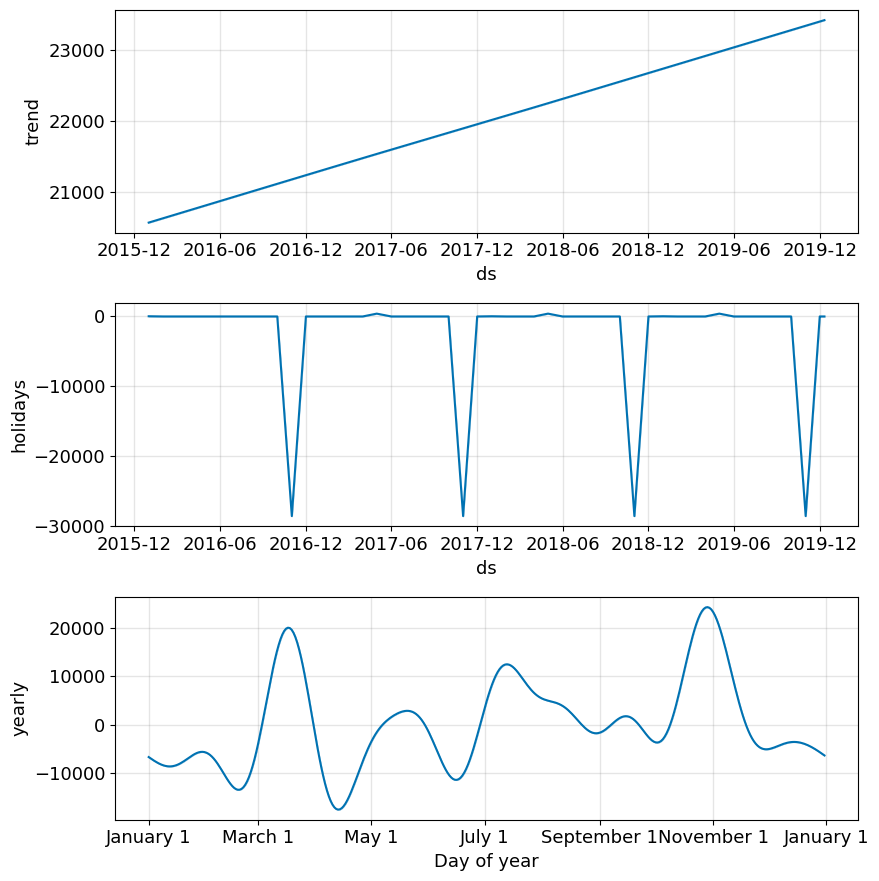

In [212]:
fig2 = model.plot_components(forecast)

La diferencia entre prophet y los modelos anteriores no es marcada en este casom ya que, a ojo podemos haver un apálisis Este se notará más adelantw con el número de víctimas. Este es un extra que podemos ver con prophet.

#### REDES NEURONALES

In [213]:
PASOS=12
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = promedio_diario['Intensidad media diaria de vehículos'].values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-12),var1(t-11),var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
12,-1.000000,-0.878763,-0.491509,-0.661322,-0.520466,-0.330492,0.452134,0.698396,-0.274609,-0.530884,-0.735877,-0.688654,-0.919491
13,-0.878763,-0.491509,-0.661322,-0.520466,-0.330492,0.452134,0.698396,-0.274609,-0.530884,-0.735877,-0.688654,-0.919491,-0.772411
14,-0.491509,-0.661322,-0.520466,-0.330492,0.452134,0.698396,-0.274609,-0.530884,-0.735877,-0.688654,-0.919491,-0.772411,-0.638184
15,-0.661322,-0.520466,-0.330492,0.452134,0.698396,-0.274609,-0.530884,-0.735877,-0.688654,-0.919491,-0.772411,-0.638184,-0.148502
16,-0.520466,-0.330492,0.452134,0.698396,-0.274609,-0.530884,-0.735877,-0.688654,-0.919491,-0.772411,-0.638184,-0.148502,-0.417766


In [214]:
values = reframed.values
n_train_days = 26
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split isnto input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(26, 1, 12) (26,) (10, 1, 12) (10,)


In [215]:
len(values)

36

In [216]:
def crear_modeloFF():
    model = Sequential()
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [217]:
EPOCHS=80
 
model = crear_modeloFF()
 
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

c:\Users\---\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1, 12)          │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169 (676.00 B)

 Trainable params: 169 (676.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.8178 - mse: 0.7522 - val_loss: 0.6488 - val_mse: 0.5725
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7336 - mse: 0.6042 - val_loss: 0.6308 - val_mse: 0.5515
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6993 - mse: 0.5543 - val_loss: 0.6126 - val_mse: 0.5310
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7199 - mse: 0.6011 - val_loss: 0.5942 - val_mse: 0.5121
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6943 - mse: 0.5683 - val_loss: 0.5759 - val_mse: 0.4949
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6664 - mse: 0.5341 - val_loss: 0.5582 - val_mse: 0.4791
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6078 - mse: 0.4560 - val_loss: 0.5404 - val_mse: 0.4642
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5691 - mse: 0.4100 - val_loss: 0.5222 - val_mse: 0.4506
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5477 - mse: 0.3972 - val_loss: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


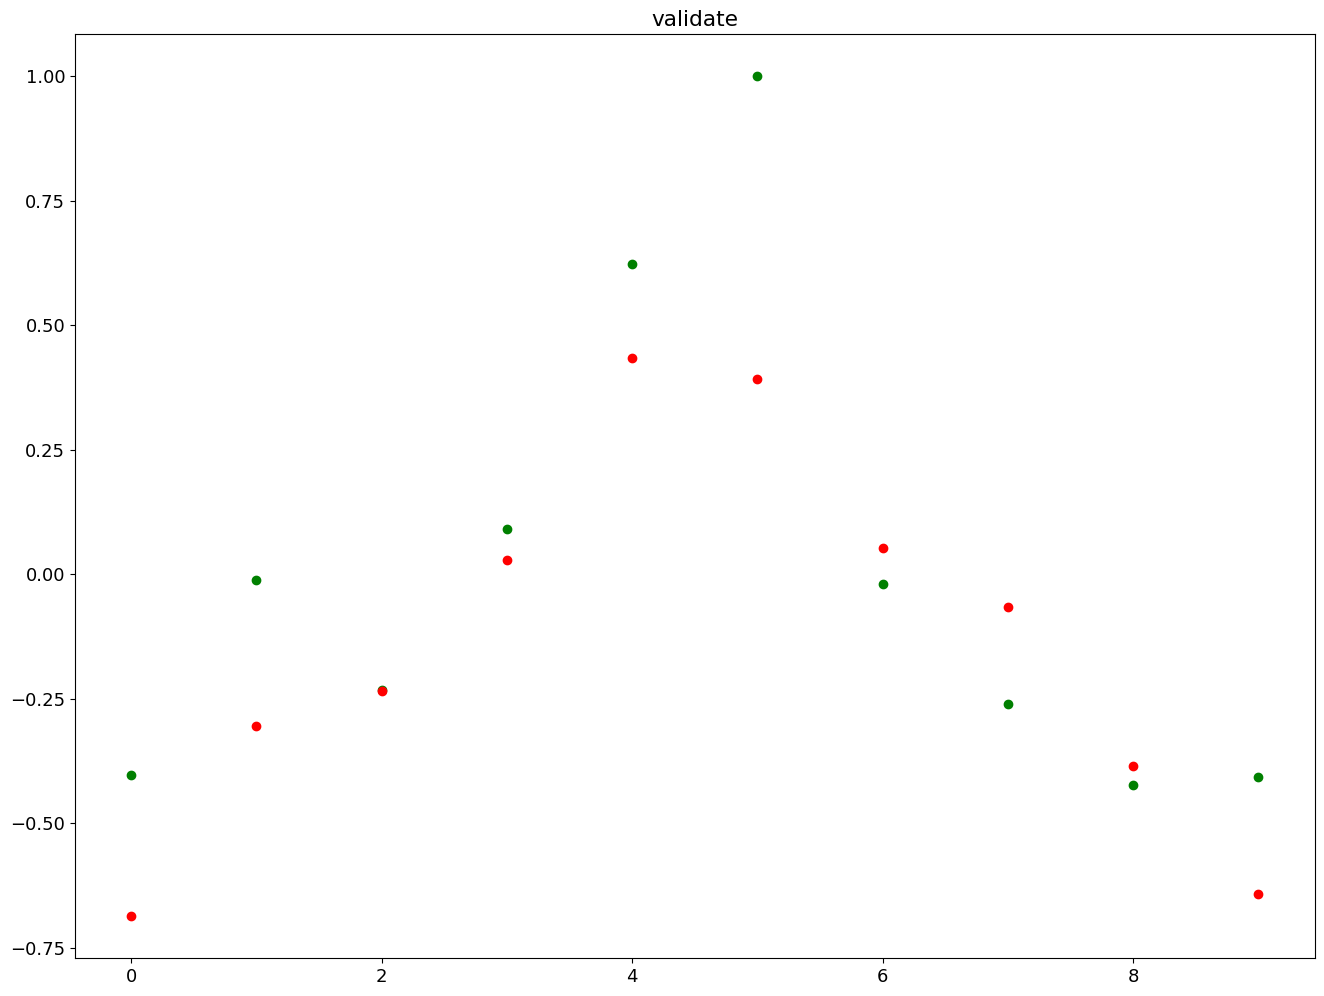

In [218]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

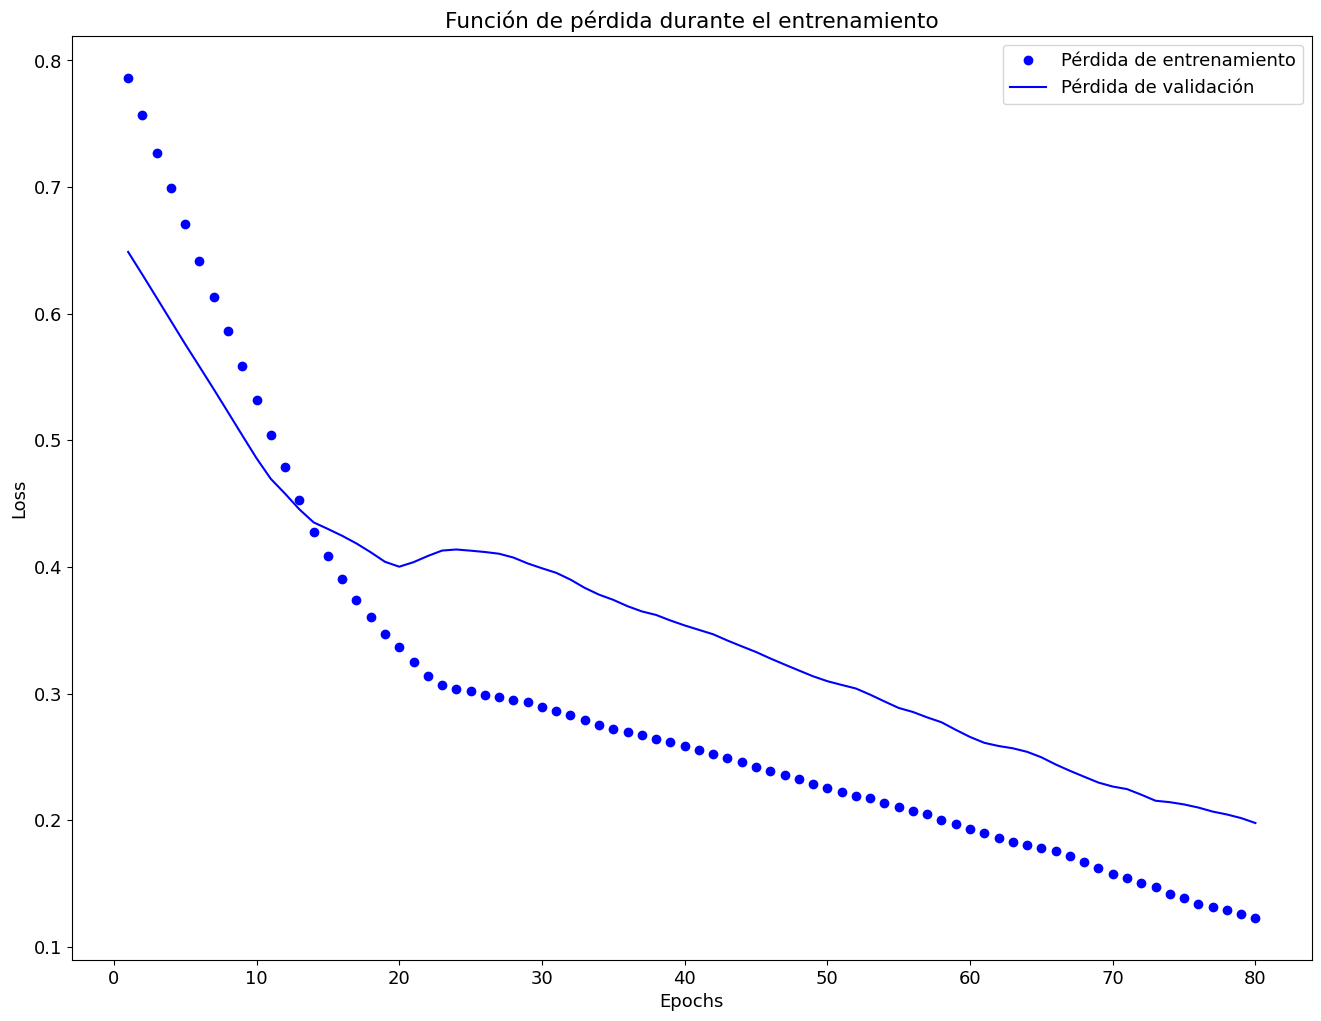

In [219]:
loss = history.history['loss']
val_loss = history.history['val_loss']

# Graficar la función de pérdida durante el entrenamiento
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida de entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Pérdida de validación')
plt.title('Función de pérdida durante el entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [220]:
resultados_viajes = scaler.inverse_transform(results)
resultados_viajes

array([[16271.267],
       [19090.207],
       [19615.143],
       [21567.014],
       [24557.799],
       [24252.805],
       [21736.523],
       [20866.127],
       [18498.176],
       [16603.17 ]], dtype=float32)

In [221]:
promedio_diario['y']

12    13959
13    14855
14    17717
15    16462
16    17503
17    18907
18    24691
19    26511
20    19320
21    17426
22    15911
23    16260
24    14554
25    15641
26    16633
27    20252
28    18262
29    20116
30    25129
31    26909
32    20254
33    18210
34    16545
35    17015
36    15423
37    15972
38    17925
39    19074
40    19054
41    20350
42    25235
43    27642
44    20951
45    19011
46    17615
47    17263
48    16202
49    17275
50    18371
51    21270
52    19623
53    22022
54    25950
55    28740
56    21206
57    19423
58    18214
59    18338
Name: y, dtype: int32

Podemos ver que por el número de datos, el modelo de red neuronal no es el mejor. Esperamos una mejoría en las provincias, donde contamos con alrededor de 4000 datos por provincia.